In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import keras
import matplotlib.pyplot
from   sklearn.model_selection import train_test_split

In [33]:
#Paths
y_train_path = "/content/drive/My Drive/Colab Notebooks/datasets/dogs/y_train.csv"
y_test_path =  "/content/drive/My Drive/Colab Notebooks/datasets/dogs/y_test.csv"
X_train_path = '/content/drive/My Drive/Colab Notebooks/datasets/dogs/train'
X_test_path =  '/content/drive/My Drive/Colab Notebooks/datasets/dogs/test'

#Loading images from drive
def loadImages(path):
    image_files = sorted([os.path.join(path, file)
                          for file in files
                          if file.endswith('.jpg')])
    return image_files

In [34]:
#Loading data
y_train = pd.read_csv(y_train_path)
y_test = pd.read_csv(y_test_path)

X_train_file_names = loadImages(X_train_path)
X_test_file_names = loadImages(X_test_path)

In [26]:
print(y_train.shape)
print(len(X_train_file_names))

(60, 1)
60


In [35]:
#Loading a picture and visualize
img = keras.preprocessing.image.load_img(X_train_file_names[15])
img_array = keras.preprocessing.image.img_to_array(img)

(240, 218, 3) float32
[63. 47. 32.]
[0.24705882 0.18431373 0.1254902 ]


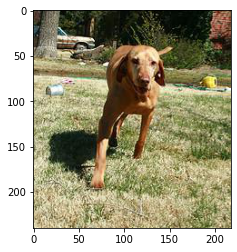

In [36]:
print(img_array.shape, img_array.dtype)

print(img_array[50, 50])

img_array = img_array/255.0

print(img_array[50, 50])

matplotlib.pyplot.imshow(img_array)
matplotlib.pyplot.show()

In [37]:
#Iterating over the filenames, load them as image and append to a numpy array
dataset = []

for i, pic in enumerate(X_train_file_names):
  act_img = keras.preprocessing.image.load_img(X_train_file_names[i])
  act_img_array = keras.preprocessing.image.img_to_array(act_img)
  act_img_array = act_img_array/255.0
  dataset.append(act_img_array)

In [38]:
dataset

[array([[[0.01568628, 0.03529412, 0.01176471],
         [0.01568628, 0.03529412, 0.01176471],
         [0.01568628, 0.03529412, 0.01176471],
         ...,
         [0.40392157, 0.31764707, 0.32941177],
         [0.38431373, 0.29803923, 0.30980393],
         [0.28235295, 0.19607843, 0.20784314]],
 
        [[0.01568628, 0.03529412, 0.01176471],
         [0.01568628, 0.03529412, 0.01176471],
         [0.01568628, 0.03529412, 0.01176471],
         ...,
         [0.32941177, 0.2509804 , 0.25490198],
         [0.36862746, 0.2901961 , 0.29411766],
         [0.32941177, 0.2509804 , 0.25490198]],
 
        [[0.01568628, 0.03529412, 0.01176471],
         [0.01568628, 0.03529412, 0.01176471],
         [0.01568628, 0.03529412, 0.01176471],
         ...,
         [0.24705882, 0.1764706 , 0.16078432],
         [0.34117648, 0.27058825, 0.25490198],
         [0.37254903, 0.3019608 , 0.28627452]],
 
        ...,
 
        [[0.29803923, 0.1882353 , 0.10196079],
         [0.3019608 , 0.19215687, 0.10588

In [39]:
#Trying to convert images into a numpy array, becuase this "dataset" is just a list
dataset = np.array(dataset,dtype='float32')

ValueError: ignored